In [1]:
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import Model

from keras.utils import np_utils
import numpy
import matplotlib.pyplot as plt

In [2]:
def data():
    X_train = numpy.load('X_train.npy')
    Y_train = numpy.load('Y_train.npy')
    X_val = numpy.load('X_val.npy')
    Y_val = numpy.load('Y_val.npy')
    X_test = numpy.load('X_test.npy')
    Y_test = numpy.load('Y_test.npy')
    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [3]:
def autoencoder(X_train, X_val, X_test):
    
# input dimension?
    model = Sequential()
    model.add(Dense({{choice([32, 64, 128,256,512,1024,2048,4096])}}, input_dim = 80967, activation='relu')) 
    model.add(Dense({{choice([32, 64, 128,256,512,1024,2048])}}, activation='relu'))
    model.add(Dense({{choice([16, 32, 64,128,256,512,1024])}}, activation='relu'))
    model.add(Dense({{choice([8, 16, 32,64,128,256,512])}}, activation='relu', name='encoded'))
    model.add(Dense({{choice([16, 32, 64,128,256,512,1024])}}, activation='relu'))
    model.add(Dense({{choice([32, 64, 128,256,512,1024,2048])}}, activation='relu'))
    model.add(Dense({{choice([32, 64, 128,256,512,1024,2048,4096])}}, activation='relu'))
    model.add(Dense(80967))
    
    model.compile(loss='mse', optimizer=SGD(learning_rate={{uniform(0, 1)}}), metrics=['mse'])

    history = model.fit(X_train, X_train, epochs = 1,
              batch_size={{choice([2000, 2750, 3300])}},
              verbose=1,
              validation_data=(X_val, X_val))
    score, mse = model.evaluate(X_test, X_test, verbose=1)
    
    plt.plot(history.history['loss']) # how make sure plots best model only?
    plt.xlabel('epochs')
    plt.ylabel('loss')
    
    return {'loss': mse, 'status': STATUS_OK, 'model': model}

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation
except:
    pass

try:
    from keras.optimizers import SGD
except:
    pass

try:
    from keras import Model
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    import numpy
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import numpy
except:
    pass

try:
    from sklearn.metrics import mean_squared_error
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'Dense': hp.choice('Dense', [32, 64, 128,256,512,1024,2048,4096]),
        'Dense_1': hp.choice('Dense_1', [32, 64, 128,256,512,1024,204

 - ETA: 3s - loss: 2.4085 - mse: 2.4085              
                                                     
24/40 [=================>............]               
 - ETA: 3s - loss: 2.3593 - mse: 2.3593              
                                                     
25/40 [=================>............]               
 - ETA: 3s - loss: 2.3283 - mse: 2.3283              
                                                     
26/40 [==================>...........]               
 - ETA: 3s - loss: 2.2946 - mse: 2.2946              
                                                     
27/40 [===================>..........]               
 - ETA: 2s - loss: 2.2966 - mse: 2.2966              
                                                     
28/40 [====================>.........]               
 - ETA: 2s - loss: 2.2655 - mse: 2.2655              
                                                     
29/40 [====================>.........]               
 - ETA: 2s - loss: 2.2650 - 

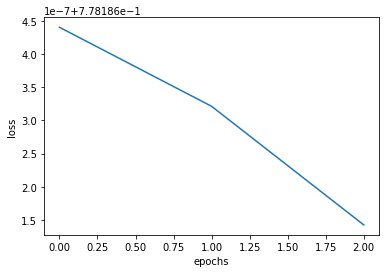

In [4]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = data()

import numpy

from sklearn.metrics import mean_squared_error

best_run, best_model = optim.minimize(model=autoencoder,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=1,
                                      trials=Trials(),
                                      notebook_name='Hyperas_Autoencoder')

plt.plot()

In [5]:
print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, X_test))

Evalutation of best performing model:
40/40 [==============================] - 9s 183ms/step - loss: 2.3054 - mse: 2.3054
[2.3054444789886475, 2.3054444789886475]


In [20]:
# saving the Learning rate individually as required for the KNN file

numpy.save('encoder_LR',best_run['learning_rate'])

In [6]:
encoder_output = best_model.get_layer('encoded').output
encoder = Model(best_model.input, encoder_output)

In [15]:
# serialize model to JSON
encoder_json = encoder.to_json()
with open("encoder.json", "w") as json_file:
    json_file.write(encoder_json)
# serialize weights to HDF5
encoder.save_weights("encoder.h5")
print("Saved encoder to disk")

Saved encoder to disk
